<div style="max-width:66ch;">

# Exercise - Logistic regression 

These are introductory exercises in Machine learning with focus in **logistic regression** used for classifcation.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

</div>

<div style="max-width:66ch;">

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

</div>


<div style="max-width:66ch;">

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

</div>


In [1]:
# Load dataset from SCIKIT-learn
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
data = load_iris()

In [11]:
data.keys()

#data['DESCR']

data['feature_names'], data['target']



(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [3]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

In [8]:
df['target'].value_counts(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


(target
 0    50
 1    50
 2    50
 Name: count, dtype: int64,
 None)

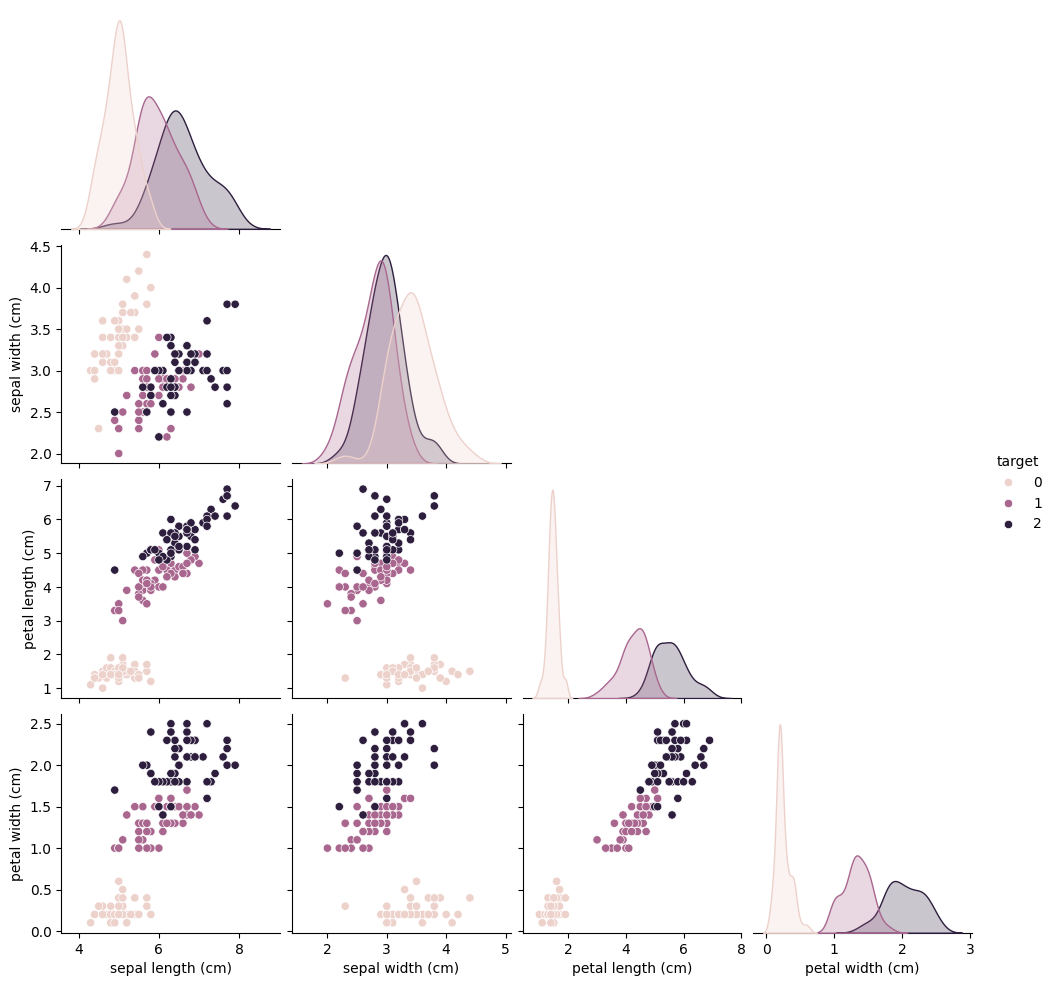

In [9]:
sns.pairplot(df, corner=True, hue='target')

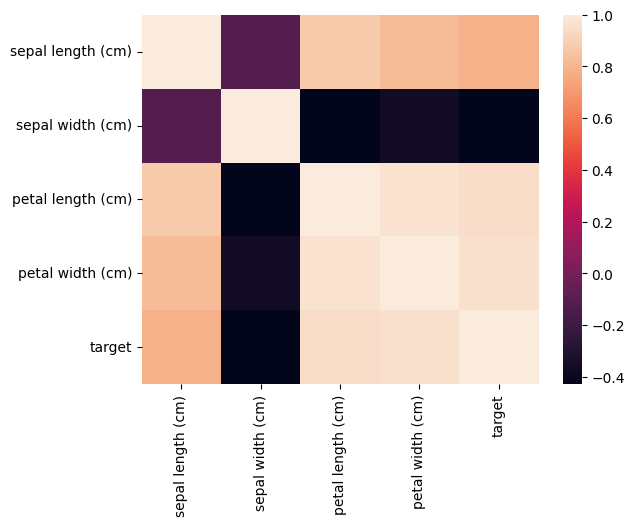

In [85]:
sns.heatmap(df.corr());

<Axes: >

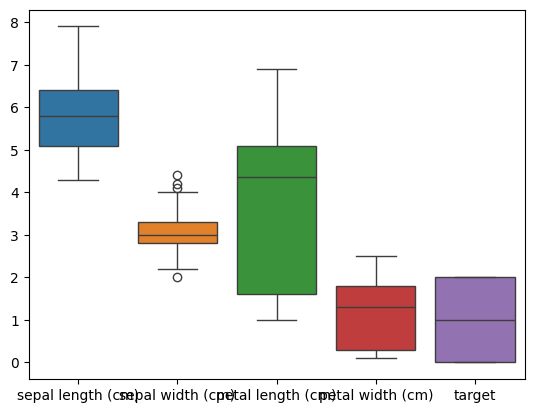

In [86]:
sns.boxplot(df)

In [132]:
iqr=pd.DataFrame()
df_filtered=pd.DataFrame()
iqr['low']=pd.DataFrame(df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25)))
iqr['high']=pd.DataFrame(df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25)))
iqr=iqr.transpose()

for col in df.columns:
    #df[col]=df[df[col]>= iqr[col][0] & df[col] <= iqr[col][1]]
    df= df[(df[col] >= iqr[col][0]) & (df[col] <= iqr[col][1])]
    
df.shape

C:\Users\Lund\AppData\Local\Temp\ipykernel_28864\1940228497.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df= df[(df[col] >= iqr[col][0]) & (df[col] <= iqr[col][1])]


(146, 5)

<div style="max-width:66ch;">

---
## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 


</div>


In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#X_train.mean(), X_test.mean(), X_train.std(), X_test.std()
#, X_test.std()

y_train.head()


25    0
26    0
24    0
85    1
73    1
Name: target, dtype: int32

<div style="max-width:66ch;">

---
## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

</div>



In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(2.998746726307124e-16,
 0.9999999999999998,
 -0.026200181679167715,
 0.9999349444958894)

In [135]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

#model = LogisticRegressionCV(penalty=None)
model = LogisticRegressionCV(penalty='elasticnet', l1_ratios=[0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 0.95], solver="saga", max_iter=int(1e5) )
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

(array([[-0.74651815,  0.71112514, -1.19574508, -1.10195068],
        [ 0.28175553, -0.34787294, -0.07142887, -0.40868315],
        [ 0.46376162, -0.3622512 ,  1.26817181,  1.51163483]]),
 array([-0.52273676,  1.34344729, -0.82071052]))

<div style="max-width:66ch;">


---
## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report and interpret it. 

</div>


In [136]:
y_pred = model.predict(scaled_X_test)

y_pred[1:10], y_test[1:10]

(array([2, 0, 0, 0, 2, 0, 1, 2, 0]),
 101    2
 28     0
 20     0
 45     0
 124    2
 30     0
 84     1
 70     1
 19     0
 Name: target, dtype: int32)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.91      0.91        11
           2       0.95      0.95      0.95        19

    accuracy                           0.96        49
   macro avg       0.95      0.95      0.95        49
weighted avg       0.96      0.96      0.96        49



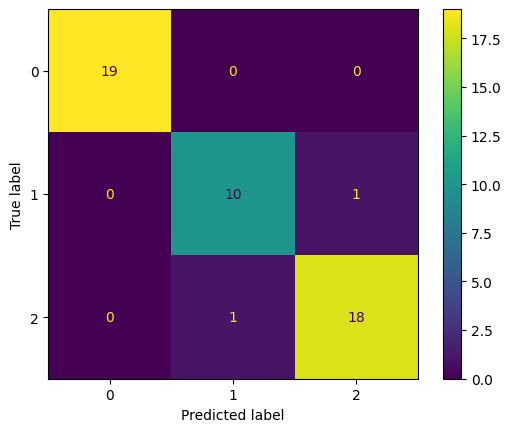

In [137]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred)) 

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

<div style="max-width:66ch;">

---

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

---

</div>

In [138]:
cm

array([[19,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 18]], dtype=int64)

<div style="width: 66ch;">


</div>

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>